In [89]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [231]:
N = 3000
norm00 = np.random.multivariate_normal([0,0], [[.05,0],[0,.05]], size=N//2)
norm11 = np.random.multivariate_normal([1.,1.], [[.05,0],[0,.05]], size=N//2)

In [250]:
labels_np = np.int64(np.hstack((np.zeros(norm00.shape[0]),
                             np.ones(norm11.shape[0])
                            )))
features_np = np.float32(np.vstack((norm00, norm11)))
data = np.hstack([features_np, labels_np[:,None]])
np.random.shuffle(data)

labels_np, features_np = np.intp(data[:,-1]), np.float32(data[:,:2])

cut = N * 2 // 3
features_training, labels_training = features_np[:cut], labels_np[:cut]
features_testing, labels_testing = features_np[cut:], labels_np[cut:]

In [271]:
#build graph
features = tf.placeholder(features_np.dtype, [None, 2])
labels = tf.placeholder(labels_np.dtype, [None])
labels_oh = tf.one_hot(labels, 2)

def weight(shape):
    return tf.Variable(tf.truncated_normal(shape = shape))

def bias(shape):
    return tf.Variable(tf.zeros(shape))

fc1 = tf.nn.relu(features @ weight((2, 200)) + bias((200)))
fc2 = tf.nn.relu(fc1 @ weight((200,200)) + bias((200)))
logits = tf.nn.relu(fc2 @ weight((200, 2)) + bias((2)))

loss = tf.losses.softmax_cross_entropy(labels_oh, logits)
classification = tf.argmax(tf.nn.softmax(logits), axis=1)
correct_classification = tf.equal(classification, labels)
accuracy = tf.reduce_mean(tf.cast(correct_classification, tf.float32))

train = tf.train.AdamOptimizer().minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_dict = {features:features_training, labels:labels_training}
testing_dict = {features:features_testing, labels:labels_testing}

for epoch in range(100):
    sess.run([train], feed_dict=training_dict)
    test_loss, test_acc = sess.run([loss, accuracy], feed_dict=testing_dict)
    print('epoch', epoch, 'loss: %.6f accuracy: %.3f' % (test_loss, test_acc))

epoch 0 loss: 0.674370 accuracy: 0.817
epoch 1 loss: 0.428528 accuracy: 0.895
epoch 2 loss: 0.440015 accuracy: 0.889
epoch 3 loss: 0.391049 accuracy: 0.919
epoch 4 loss: 0.345553 accuracy: 0.937
epoch 5 loss: 0.337347 accuracy: 0.931
epoch 6 loss: 0.342220 accuracy: 0.937
epoch 7 loss: 0.350233 accuracy: 0.934
epoch 8 loss: 0.356860 accuracy: 0.934
epoch 9 loss: 0.358457 accuracy: 0.937
epoch 10 loss: 0.352456 accuracy: 0.940
epoch 11 loss: 0.343870 accuracy: 0.937
epoch 12 loss: 0.338415 accuracy: 0.937
epoch 13 loss: 0.334084 accuracy: 0.937
epoch 14 loss: 0.329339 accuracy: 0.934
epoch 15 loss: 0.323625 accuracy: 0.934
epoch 16 loss: 0.315426 accuracy: 0.937
epoch 17 loss: 0.305366 accuracy: 0.937
epoch 18 loss: 0.296731 accuracy: 0.940
epoch 19 loss: 0.288010 accuracy: 0.940
epoch 20 loss: 0.281265 accuracy: 0.937
epoch 21 loss: 0.275414 accuracy: 0.943
epoch 22 loss: 0.265250 accuracy: 0.943
epoch 23 loss: 0.252807 accuracy: 0.940
epoch 24 loss: 0.242808 accuracy: 0.940
epoch 25 l

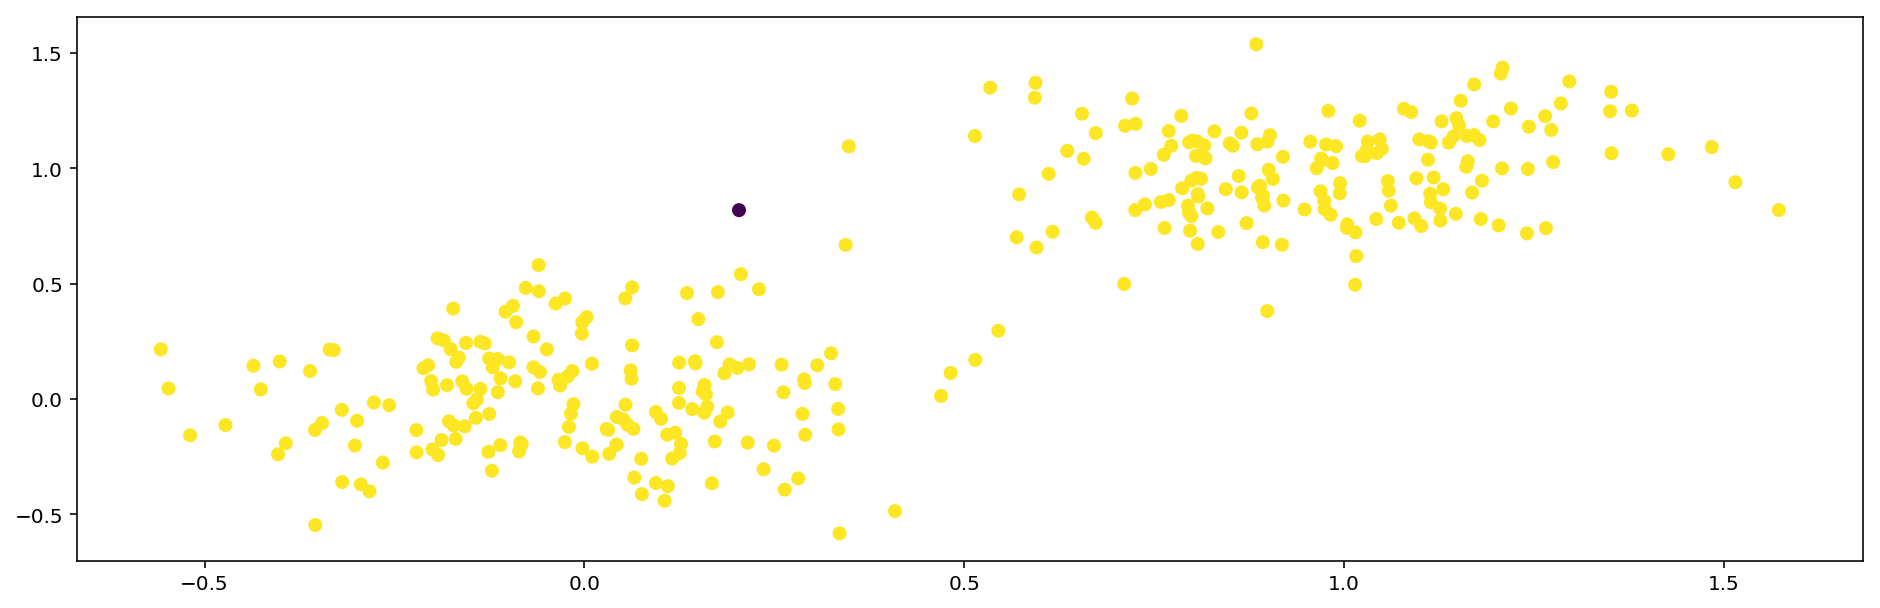

In [273]:
classes = sess.run(classification, feed_dict=testing_dict)
plt.scatter(features_testing[:,0], features_testing[:,1], c = classes == labels_testing)